In [145]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [198]:
unitTime_in_Myrs = 3.22 # Myrs
UnitDensity_in_cgs = 1.44e-21

In [225]:
jj = 0
file = h5py.File('./output_Gad_19k/snap_' + str(jj).zfill(3) +'.hdf5', 'r')

In [226]:
tStep = 0.005 # From Gadget parameter file.
currentTime = jj * tStep * unitTime_in_Myrs
print(f'currentTime = {round(currentTime, 3)} Myrs.')

currentTime = 0.0 Myrs.


In [227]:
file.keys()

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0']>

In [228]:
file['Parameters']

<HDF5 group "/Parameters" (0 members)>

In [229]:
file['PartType0'].keys()

<KeysViewHDF5 ['Coordinates', 'Density', 'InternalEnergy', 'Masses', 'ParticleIDs', 'SmoothingLength', 'Velocities']>

In [230]:
coord = file['PartType0']['Coordinates']
coord

<HDF5 dataset "Coordinates": shape (38786, 3), type "<f4">

In [231]:
vel = file['PartType0']['Velocities']
np.sort((vel[:, 0]))

array([-2.4086134, -2.4086134, -2.4086134, ...,  2.4086134,  2.4086134,
        2.4086134], dtype=float32)

(-1.5, 1.5)

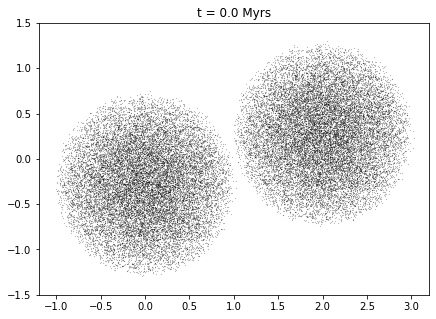

In [232]:
#with open('../Testing_Auto_timestep/Outputs_0.5_m_8k_my_code/00400.pkl', 'rb') as f:
#    data = pickle.load(f)
#    r = data['pos']

#j = 320
    
#print(r.shape)
plt.figure(figsize = (7, 5))
plt.scatter(coord[:, 0], coord[:, 1], s = 0.01, color = 'black')
#plt.plot(coord[j, 0], coord[j, 1], marker = 'o', color = 'red')
#plt.scatter(r[:, 0], r[:, 1], s = 0.02, color = 'blue')

# xyrange = 0.5
# plt.xlim(-xyrange, xyrange)
# plt.ylim(-xyrange, xyrange)

plt.title(f't = {round(currentTime, 3)} Myrs')

plt.xlim(-1.2, 3.2)
plt.ylim(-1.5, 1.5)

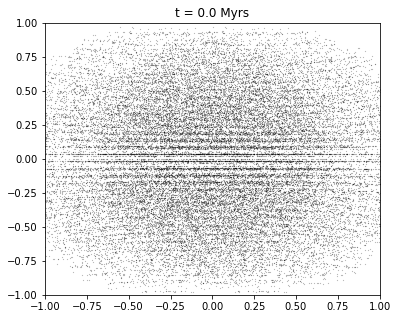

In [233]:
plt.figure(figsize = (6, 5))
plt.scatter(coord[:, 1], coord[:, 2], s = 0.01, color = 'black')

xyrange = 1.0
plt.xlim(-xyrange, xyrange)
plt.ylim(-xyrange, xyrange)
plt.title(f't = {round(currentTime, 3)} Myrs');


In [241]:
h = np.array(file['PartType0']['SmoothingLength'])

np.min(h), np.max(h), np.median(h)

(0.05828935, 0.25811636, 0.12714848)

In [240]:
rho = np.array(list(file['PartType0']['Density']))
np.sort(rho) * UnitDensity_in_cgs

array([5.2484882e-23, 5.4120900e-23, 6.2652734e-23, ..., 4.1213765e-21,
       4.3556488e-21, 4.4743262e-21], dtype=float32)

In [248]:
rho

array([0.09813468, 0.07703984, 0.18400751, ..., 0.38901767, 0.0831916 ,
       0.09153029], dtype=float32)

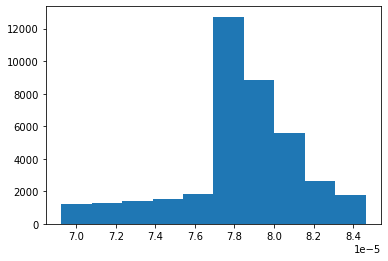

In [247]:
plt.hist(rho * (h/2.)**3);

In [200]:
u = file['PartType0']['InternalEnergy']
min(u), max(u), np.median(u)

(0.644602, 0.644602, 0.644602)

In [246]:
m = np.array(file['PartType0']['Masses'])
np.sort(m)

array([5.1565e-05, 5.1565e-05, 5.1565e-05, ..., 5.1565e-05, 5.1565e-05,
       5.1565e-05], dtype=float32)

In [29]:
v = file['PartType0']['Velocities']
v

<HDF5 dataset "Velocities": shape (32768, 3), type "<f4">

In [ ]:
ids = file['PartType0']['ParticleIDs']
ids

In [ ]:
len(np.unique(list(ids)))